# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data validation

In [1]:
# Load the data
import pandas as pd
import numpy as np
df = pd.read_csv('recipe_site_traffic_2212.csv')
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [2]:
# Check for data consistency
# Counting missing values
missing_values = df.isnull().sum()

# Displaying unique values for categorical columns
unique_values_category = df['category'].unique()
unique_values_servings = df['servings'].unique()
unique_values_high_traffic = df['high_traffic'].unique()

# Displaying the results
print("Number of missing values in each column:")
print(missing_values)
print("\nUnique values in the 'category' column:")
print(unique_values_category)
print("\nUnique values in the 'servings' column:")
print(unique_values_servings)
print("\nUnique values in the 'high_traffic' column:")
print(unique_values_high_traffic)

Number of missing values in each column:
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

Unique values in the 'category' column:
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']

Unique values in the 'servings' column:
['6' '4' '1' '2' '4 as a snack' '6 as a snack']

Unique values in the 'high_traffic' column:
['High' nan]


# Exploratory analysis

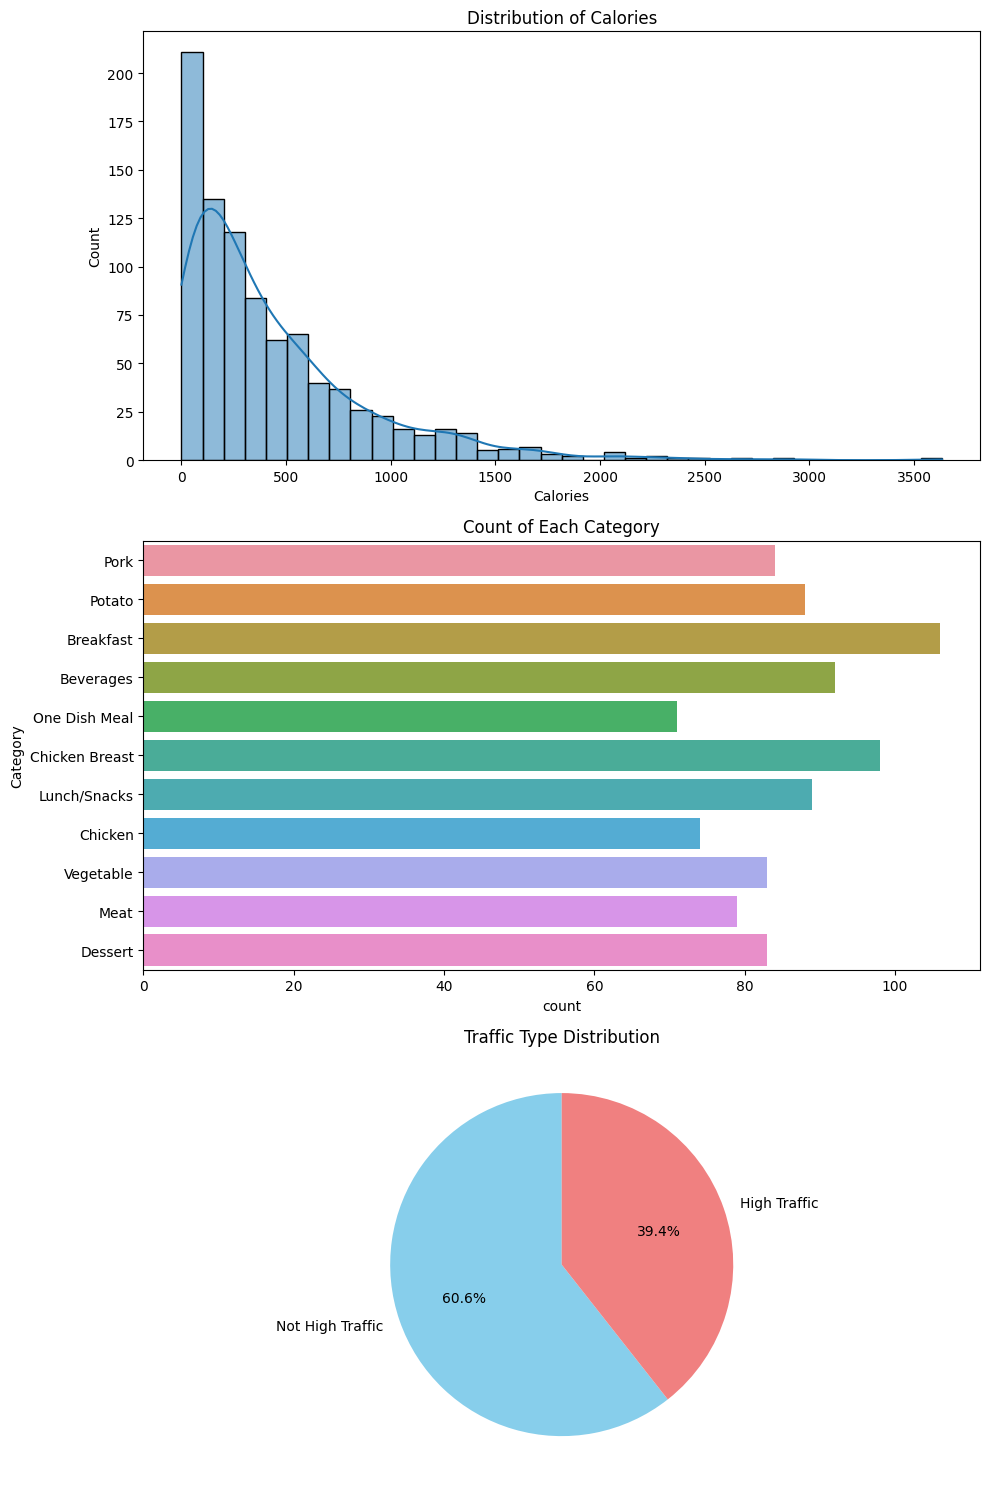

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for 'calories'
sns.histplot(df['calories'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Calories')
axes[0].set_xlabel('Calories')  

# Countplot for 'category'
sns.countplot(y=df['category'], ax=axes[1])
axes[1].set_title('Count of Each Category')
axes[1].set_ylabel('Category')

# Correcting the 'high_traffic' column to treat it as boolean
df['high_traffic'] = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)

# Calculate the percentage of each category
traffic_distribution = df['high_traffic'].value_counts()
traffic_labels = ['Not High Traffic', 'High Traffic']

# Plotting the pie chart
axes[2].pie(traffic_distribution, labels=traffic_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[2].set_title('Traffic Type Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [4]:
from scipy.stats import chi2_contingency
# Creating a contingency table to see the possible corelation between the features and the trafic
contingency_table = pd.crosstab(df['category'], df['high_traffic'], margins=True)

# Performing chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Displaying the contingency table
print("Contingency Table:")
print(contingency_table)

# Displaying the chi-square test results
print("\nChi-square test results:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Contingency Table:
high_traffic      0    1  All
category                     
Beverages        87    5   92
Breakfast        73   33  106
Chicken          47   27   74
Chicken Breast   52   46   98
Dessert          30   53   83
Lunch/Snacks     32   57   89
Meat             20   59   79
One Dish Meal    19   52   71
Pork              7   77   84
Potato            5   83   88
Vegetable         1   82   83
All             373  574  947

Chi-square test results:
Chi2 value: 320.22296286253834
P-value: 9.478670005972444e-55


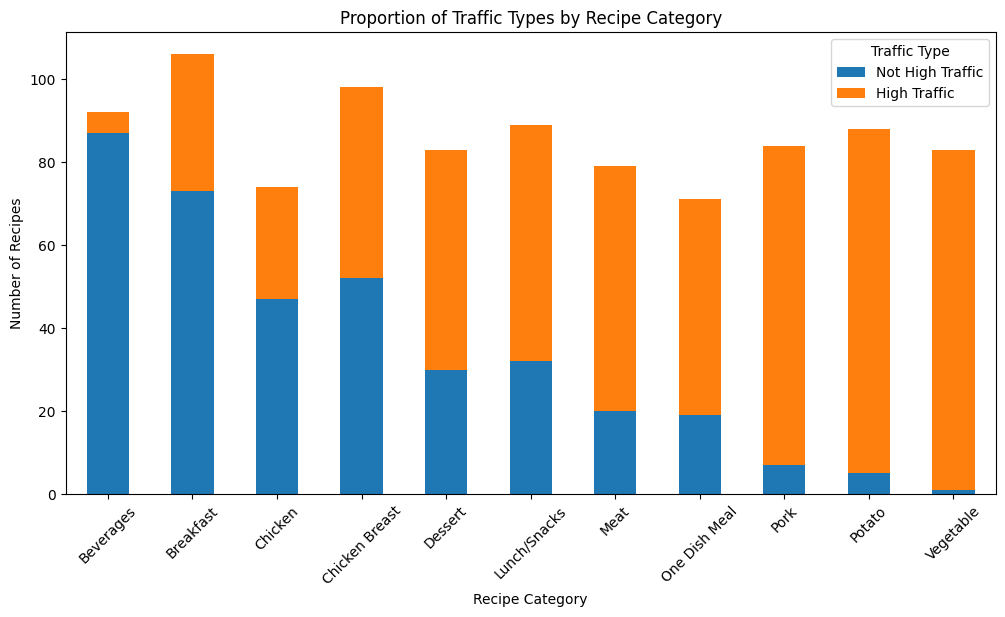

In [5]:
# Creating a stacked bar chart to show the proportion of high traffic and not high traffic recipes in each category

# Preparing the data for the stacked bar chart
traffic_by_category = pd.crosstab(df['category'], df['high_traffic'])
traffic_by_category.columns = ['Not High Traffic', 'High Traffic']

# Plotting
traffic_by_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Traffic Types by Recipe Category')
plt.xlabel('Recipe Category')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.legend(title='Traffic Type')
plt.show()


In [6]:
from scipy.stats import pointbiserialr
# Since the calories vary greatly, we need another test to check the corelation. For this purpose we need to impute the Null values in the test dataset
# Calculate point-biserial correlation coefficient and p-value
test_df=df.dropna(subset='calories')
corr_coefficient, p_value = pointbiserialr(test_df['calories'], test_df['high_traffic'])

# Display the results
print(f"Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Point-Biserial Correlation Coefficient: 0.07438204017479884
P-value: 0.026065982071965213


Point-Biserial Correlation Coefficient has a  positive value of 0.074, suggests a weak positive correlation between 'calories' and 'high_traffic'. 

The p-value of 0.026 is below the commonly used significance level of 0.05 (5%). This suggests that the observed correlation is statistically significant, meaning it is unlikely to have occurred by random chance.

## **Summary of Recipe Traffic Analysis**

We analyzed the traffic data for different recipe categories on our site and found some interesting patterns. The data shows a clear trend: certain categories, like Pork, Potato, and Vegetable, are much more likely to attract high traffic compared to others, such as Beverages and Chicken. **This suggests that visitors have distinct preferences for certain types of recipes.**

A Chi-square test confirmed that this isn't just a random occurrence; there's a significant link between the type of recipe and how much traffic it gets.
The above chart illustrated the number of recipes in each category and how many of them are popular. The longer the colored top part of each bar, the more popular recipes in that category.

On the other hand, Point-Biserial Correlation Coefficient test confirmed that there is a **weak positive correlation between 'calories' and 'high_traffic'.**

# Build a base model to predict possible high traffict

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Design a data cleaning function
def preprocess_data(df, numerical_features, categorical_features, target_column='high_traffic'):
    # Drop NA
    clean_df = df.copy().dropna(subset=numerical_features + categorical_features)

    # Format the serving data
    clean_df['servings'] = clean_df['servings'].str.extract('(\d+)').astype(float)

    # Correcting the target column to treat it as boolean
    clean_df[target_column] = clean_df[target_column].apply(lambda x: 1 if x == 'High' else 0)

    # Define features and target variable
    X = clean_df[numerical_features + categorical_features]
    y = clean_df[target_column]

    return X, y

# Design a pipeline to input processed data into ML models
def create_model_pipeline(numerical_features, categorical_features, random_state=4531):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features)
        ])

    # Create a pipeline with the ColumnTransformer and the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ])

    return pipeline


In [16]:
# Test a baseline RandomForest model with 3 features
train_df=pd.read_csv('recipe_site_traffic_2212.csv') # Reload the training DF in case we want to edit it for different EDA

numerical_features = ['calories']
categorical_features = ['servings', 'category']

X, y= preprocess_data(train_df, numerical_features, categorical_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4531)

# Create model pipeline
base_pipeline = create_model_pipeline(numerical_features, categorical_features)

# Fit the pipeline on the training data
base_pipeline.fit(X_train, y_train)

# Make predictions
base_predictions = base_pipeline.predict(X_test)

# Evaluate the model
print('Baseline model Classification report:')
print(classification_report(y_test, base_predictions))


              precision    recall  f1-score   support

           0       0.64      0.69      0.67        75
           1       0.77      0.72      0.74       104

    accuracy                           0.71       179
   macro avg       0.70      0.71      0.70       179
weighted avg       0.71      0.71      0.71       179



In [17]:
from sklearn.model_selection import GridSearchCV

# Build a full model with all features. This code will take a while to run
full_numerical_features = ['calories', 'carbohydrate', 'sugar', 'protein']
full_categorical_features = ['servings', 'category']

X_full, y_full = preprocess_data(train_df, full_numerical_features, full_categorical_features)
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, random_state=4531)

# Create model pipeline
pipeline_full = create_model_pipeline(full_numerical_features, full_categorical_features)


# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline_full, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_full_train, y_full_train)

# Access the best_estimator_ to get the model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_full_pred = best_model.predict(X_full_test)

# Display results
print("Best Parameters:", grid_search.best_params_)

print("\nImproved model Classification Report:\n", classification_report(y_full_test, y_full_pred))


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60        75
           1       0.71      0.81      0.76       104

    accuracy                           0.70       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.70      0.70      0.69       179



In [18]:
# Get feature names after preprocessing
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out(input_features=full_numerical_features + full_categorical_features)

# Get feature importances from the best model
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Print or visualize feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
num__calories: 0.10288124836592298
num__carbohydrate: 0.1044450970784369
num__sugar: 0.10267781192751894
num__protein: 0.1527278867440053
cat__servings_1.0: 0.014440551931715166
cat__servings_2.0: 0.015673504802825693
cat__servings_4.0: 0.011871133200011836
cat__servings_6.0: 0.014378739717178965
cat__category_Beverages: 0.1449680506400857
cat__category_Breakfast: 0.0737226657006853
cat__category_Chicken: 0.04483194131141539
cat__category_Chicken Breast: 0.020737415986082156
cat__category_Dessert: 0.00816817011515816
cat__category_Lunch/Snacks: 0.009970870761978116
cat__category_Meat: 0.011557111932060176
cat__category_One Dish Meal: 0.012026259420091721
cat__category_Pork: 0.03451141963388608
cat__category_Potato: 0.052017134591905156
cat__category_Vegetable: 0.06839298613903629


# Build a neural network model

The simple logistic regression model has an overall accuracy of around 70%, which is not too bad but not too good either. We can try to use a Neural Network here

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Split the data into training and testing sets within the pipeline
NN_X, NN_y = preprocess_data(train_df, full_numerical_features, full_categorical_features)

# Split the data into training and testing sets
NN_X_train, NN_X_test, NN_y_train, NN_y_test = train_test_split(NN_X, NN_y, test_size=0.2, random_state=4531)

# Create a ColumnTransformer for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), full_numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), full_categorical_features)
    ])

# Define the neural network model
NN_model = Sequential([
    Dense(64, activation='relu', input_shape=(19,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create the full pipeline with the model
NN_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', NN_model)
])

# Fit the model to the training data with EarlyStopping callback
NN_pipeline.fit(NN_X_train, NN_y_train, model__epochs=100, model__validation_split=0.2, model__callbacks=[early_stopping])

# Make predictions on the test set
nn_y_pred = (NN_pipeline.predict(NN_X_test) > 0.5).astype(int)

# Display the classification report
print("Neural Network Classification Report:")
print(classification_report(NN_y_test, nn_y_pred))


Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 0.6697 - accuracy: 0.5979 - val_loss: 0.6399 - val_accuracy: 0.6389
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6311 - val_loss: 0.6143 - val_accuracy: 0.6806
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.6748 - val_loss: 0.5877 - val_accuracy: 0.7361
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.7185 - val_loss: 0.5590 - val_accuracy: 0.7500
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7395 - val_loss: 0.5296 - val_accuracy: 0.7917
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5176 - accuracy: 0.7745 - val_loss: 0.5060 - val_accuracy: 0.7917
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7850 - val_loss: 0.4891 - val_accuracy: 0.8056
Epoch 8/100
1

# Model evaluation

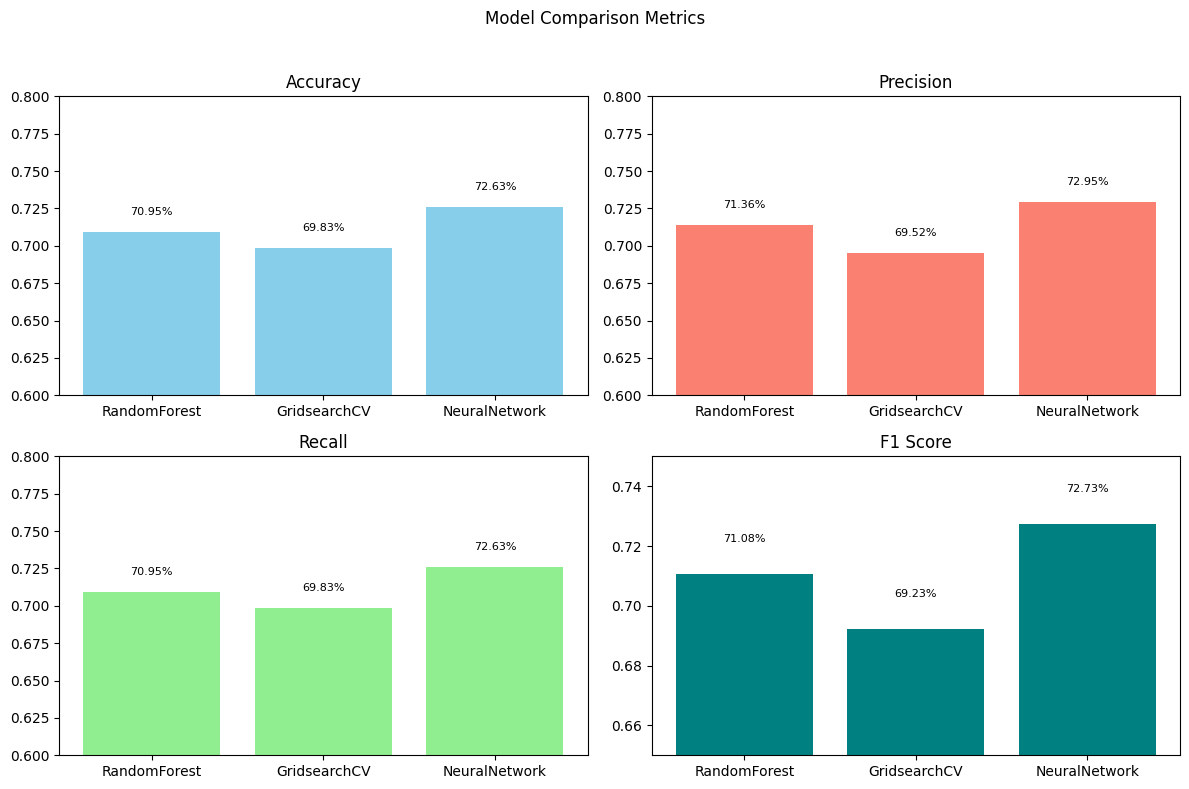

In [24]:
# Extracting metrics from classification reports
metrics = ['precision', 'recall', 'f1-score', 'support']
model_names = ['RandomForest', 'GridsearchCV', 'NeuralNetwork']
true_values = [y_test,y_full_test,NN_y_test]
predicted_values=[base_predictions,y_full_pred,nn_y_pred]

# Initializing dictionaries to store metric values for each model
accuracy = {}
precision = {}
recall = {}
f1_score = {}

# Looping through the models and extracting metric values
for i, (y_true, y_pred) in enumerate(zip(true_values, predicted_values)):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    accuracy[model_names[i]] = report_dict['accuracy']
    precision[model_names[i]] = report_dict['weighted avg']['precision']
    recall[model_names[i]] = report_dict['weighted avg']['recall']
    f1_score[model_names[i]] = report_dict['weighted avg']['f1-score']

# Creating a bar chart with numeric values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Model Comparison Metrics')

# Function to annotate bars with numeric values
def annotate_bars(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom', fontsize=8)

# Accuracy
ax = axes[0, 0]
bars = ax.bar(model_names, [accuracy[model] for model in model_names], color='skyblue')
ax.set_title('Accuracy')
ax.set_ylim(0.6, 0.8)
annotate_bars(ax, [accuracy[model] for model in model_names])

# Precision
ax = axes[0, 1]
bars = ax.bar(model_names, [precision[model] for model in model_names], color='salmon')
ax.set_title('Precision')
ax.set_ylim(0.6, 0.8)
annotate_bars(ax, [precision[model] for model in model_names])

# Recall
ax = axes[1, 0]
bars = ax.bar(model_names, [recall[model] for model in model_names], color='lightgreen')
ax.set_title('Recall')
ax.set_ylim(0.6, 0.8)
annotate_bars(ax, [recall[model] for model in model_names])

# F1 Score
ax = axes[1, 1]
bars = ax.bar(model_names, [f1_score[model] for model in model_names], color='teal')
ax.set_title('F1 Score')
ax.set_ylim(0.65, 0.75)
annotate_bars(ax, [f1_score[model] for model in model_names])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Metrics explanation
**Accuracy:** This is the overall success rate of the model in predicting high-traffic recipes. It tells us how often the model's predictions are correct, regardless of whether it's predicting high or low traffic.

**Precision:** This measures how reliable the model is when it predicts a recipe will have high traffic. High precision means when the model predicts high traffic, it's likely to be correct. This is important for focusing efforts on truly promising recipes.

**Recall:** This indicates the model's ability to identify all actual high-traffic recipes. High recall means the model is good at catching most of the recipes that will be popular, reducing the chance of missing out on key opportunities.

**F1 Score:** This is a balance between precision and recall, providing a single measure to assess the model's accuracy in identifying high-traffic recipes while minimizing false alarms. It's especially useful for evaluating the overall effectiveness of the model when both identifying and not missing high-traffic recipes are equally important.

We can see, with a very basic neural network model, it has already achieve a slightly better result than prebuilt model (RandomForest), even with the best parameters (using GridsearchCV). The Neural network model could work even better if we engineer the features

# Recommendations
**1. Focus on High-Performing Categories:** 

Increase the proportion of recipes in categories like 'Pork', 'Potato', and 'Vegetable', as they have higher chances of attracting high traffic.

To capitalize on the model's predictions, we can implement a dedicated section on the website to showcase recipes from identified high-impact categories. This strategic placement ensures that these recipes receive prominent visibility, increasing the likelihood of attracting user attention.

**2. Nutrition-Based Marketing:** 

While nutrition values are not the strongest predictors, they still play a role. Highlighting nutritional aspects in marketing campaigns might attract a health-conscious audience.

**3. Continuous Monitoring and Updating:** 

Regularly monitor the performance of different recipe categories and update the model as user preferences evolve over time.

**4. Dynamic Content Recommendations:**

To enhance user engagement, a dynamic recommendation system should be integrated. By leveraging the model's predictions and user preferences, this system can provide personalized recommendations, ensuring that users encounter content aligned with their interests.



